Training Code

Accuracy: 0.9975886182782735
Confusion Matrix:
 [[1939    4]
 [   6 2198]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1943
           1       1.00      1.00      1.00      2204

    accuracy                           1.00      4147
   macro avg       1.00      1.00      1.00      4147
weighted avg       1.00      1.00      1.00      4147



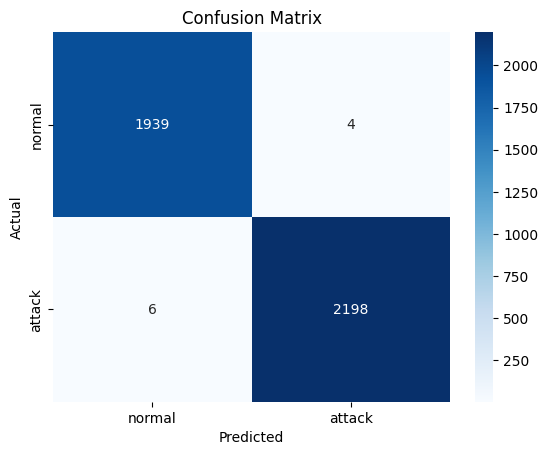

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# 📂 Step 2: Load and Preprocess Dataset
df = pd.read_csv("/content/Train.txt", sep=",", names=[
    "duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment",
    "urgent", "hot", "numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted",
    "numroot", "numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin",
    "isguestlogin", "count", "srvcount", "serrorrate", "srvserrorrate", "rerrorrate", "srvrerrorrate",
    "samediprate", "diffsrvrate", "dsthostcount", "dsthostsrvcount", "dsthostsamedsrvrate",
    "dsthostdiffsrvrate", "dsthostserrorrate", "dsthostsrvserrorrate", "dsthostrerrorrate",
    "dsthostsrvrerrorrate", "attack", "lastflag"])

# Clean and preprocess
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'], axis=1, inplace=True)
df.loc[df['attack'] != 'normal', 'attack'] = 'attack'

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split dataset
X = df.drop('attack', axis=1)
y = df['attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🎯 Evaluate
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", cm)

# 💬 Classification Report
print("\nClassification Report:\n", classification_report(y_test, pred))

# 📈 Confusion Matrix Visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'attack'], yticklabels=['normal', 'attack'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 💾 Save model
with open("trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

**Test Code**

In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# 🔁 Load test data
test_df = pd.read_csv("/content/Test.txt", sep=",", names=[
    "duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment",
    "urgent", "hot", "numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted",
    "numroot", "numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin",
    "isguestlogin", "count", "srvcount", "serrorrate", "srvserrorrate", "rerrorrate", "srvrerrorrate",
    "samediprate", "diffsrvrate", "dsthostcount", "dsthostsrvcount", "dsthostsamedsrvrate",
    "dsthostdiffsrvrate", "dsthostserrorrate", "dsthostsrvserrorrate", "dsthostrerrorrate",
    "dsthostsrvrerrorrate", "attack", "lastflag"])

# 🧹 Clean and preprocess test data (same steps as training)
test_df.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)
test_df.loc[test_df['attack'] != 'normal', 'attack'] = 'attack'

# Encode categorical columns
le = LabelEncoder()
for col in test_df.select_dtypes(include='object').columns:
    test_df[col] = le.fit_transform(test_df[col])

# 📦 Split features and labels
X_test = test_df.drop('attack', axis=1)
y_test = test_df['attack']

# 🔓 Load trained model
with open("trained_model.pkl", "rb") as f:
    model = pickle.load(f)

# 🧠 Predict and evaluate
pred = model.predict(X_test)
print(pred)
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, pred))


[0 0 1 ... 0 1 0]
Test Accuracy: 0.8605393896380412
